<a href="https://colab.research.google.com/github/PedroGonzalezBeermann2020/HIV/blob/main/bih.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
install.packages("sm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(dplyr)
library(sm)

Package 'sm', version 2.2-5.7: type help(sm) for summary information



In [101]:
data=read.csv("https://raw.githubusercontent.com/PedroGonzalezBeermann2020/HIV/main/DatosHIV2.csv",sep=";")
data

CVPre.IA,Edad,Sexo,Orientacion,RelSexual,Post.AIA,Nivel
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
2749,26,Mujer,Heterosexual,No,INDETECTABLE,INDETECTABLE
5038,28,Hombre,Homosexual,No,INDETECTABLE,INDETECTABLE
5608,40,Mujer,Heterosexual,No,<40,<40
11080,18,Mujer,Heterosexual,Si,INDETECTABLE,INDETECTABLE
166844,27,Mujer,Heterosexual,Si,439,BAJO
5608,18,Hombre,Homosexual,No,INDETECTABLE,INDETECTABLE
40004,28,Mujer,Heterosexual,Si,INDETECTABLE,INDETECTABLE
162016,33,Mujer,Heterosexual,No,394,BAJO
3718,33,Mujer,Heterosexual,No,INDETECTABLE,INDETECTABLE


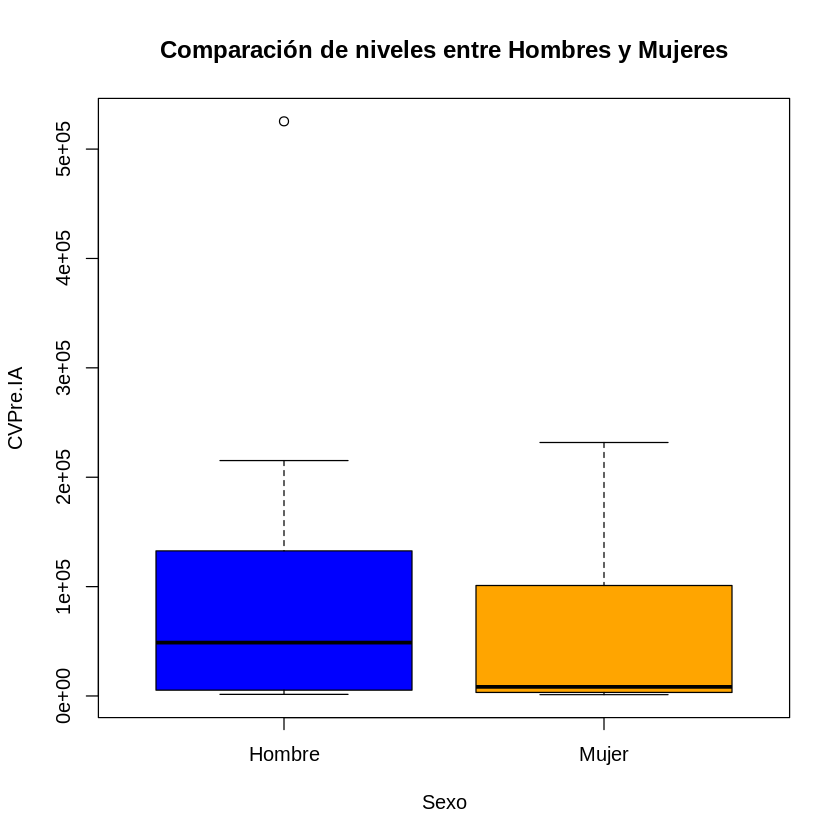

In [10]:
dfh<- data %>% filter(Sexo=="Hombre")
boxplot(CVPre.IA~Sexo,data=data,main="Comparación de niveles entre Hombres y Mujeres",col=c("blue","orange"))

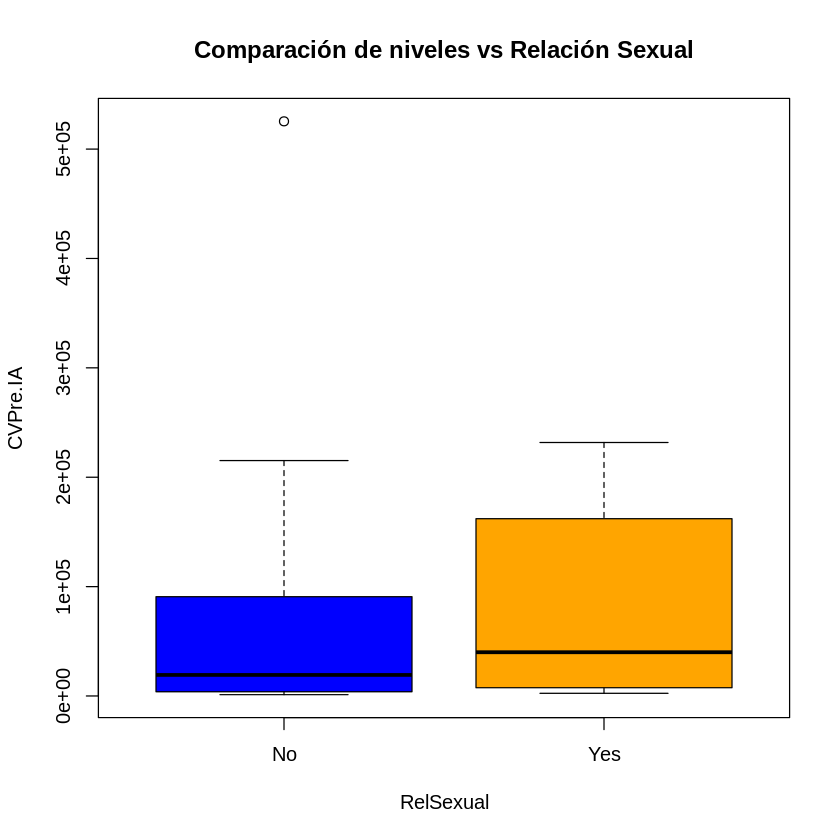

In [ ]:
boxplot(CVPre.IA~RelSexual,data=data,main="Comparación de niveles vs Relación Sexual",col=c("blue","orange"))

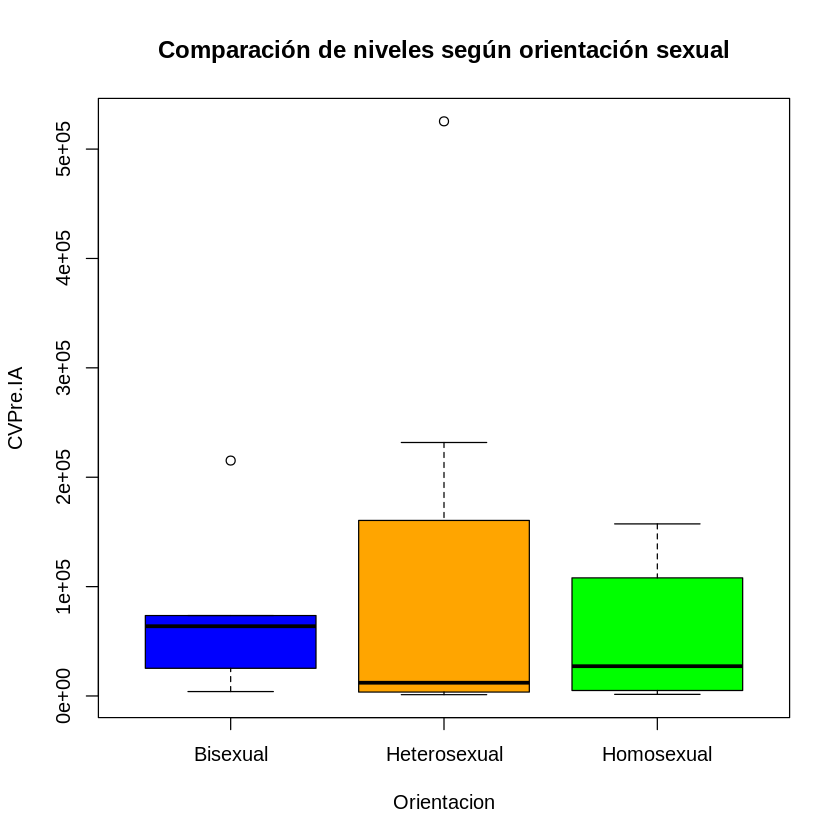

In [11]:
boxplot(CVPre.IA~Orientacion,data=data,main="Comparación de niveles según orientación sexual",col=c("blue","orange","green"))

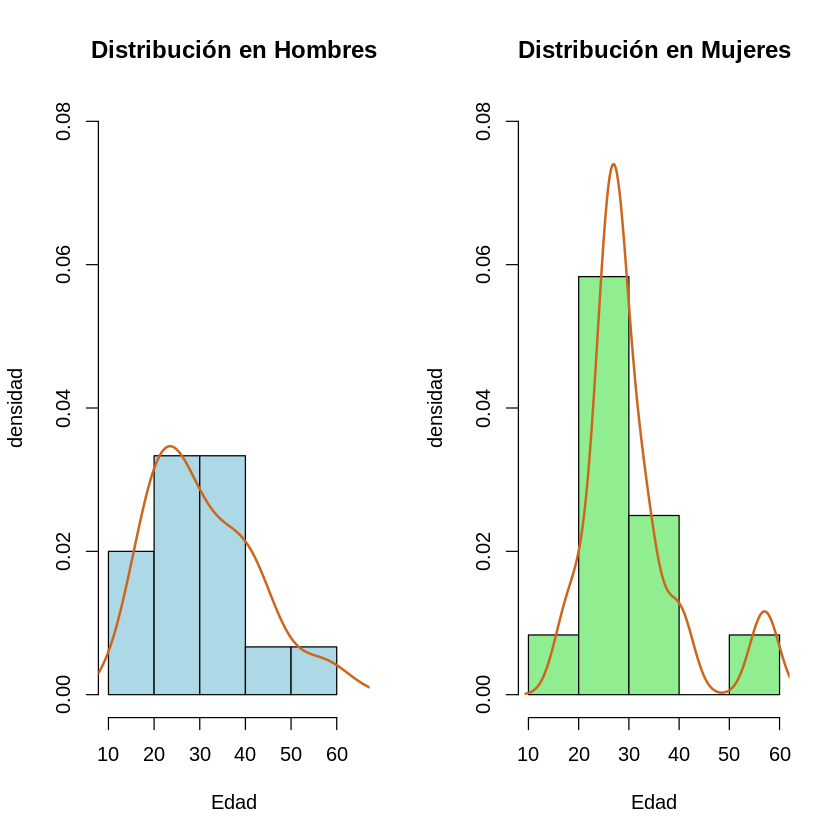

In [12]:
dfh<- data %>% filter(Sexo=="Hombre")
dfm<- data %>% filter(Sexo=="Mujer")
par(mfrow=c(1, 2))
# Create side-by-side histograms
hist(dfh$Edad, main="Distribución en Hombres", xlab="Edad",
     ylab="densidad", col="lightblue",ylim=c(0,0.08),xlim=c(10, 65),prob = TRUE,)

lines(density(dfh$Edad),
      lwd = 2,
      col = "chocolate3")
hist(dfm$Edad, main="Distribución en Mujeres", xlab="Edad",
     ylab="densidad", col="lightgreen",prob=TRUE,ylim=c(0,0.08))
lines(density(dfm$Edad),
      lwd = 2,
      col = "chocolate3")

In [17]:
# Create a continuous variable
variable <- c(300.00, 30,000.00, 12,500.00, 250.00, 500.00)

breaks <- c(0, 40, 500, 1000, Inf)
labels <- c("Bajo", "Medio", "Alto", "Muy Alto")
# Define the desired number of bins
num_bins <- 3

# Convert the variable to a range by dividing it into bins

variable_range <- cut(data$Post.AIA, breaks = breaks, labels = labels)

# Print the variable range
print(variable_range)

ERROR: Error in cut.default(data$Post.AIA, breaks = breaks, labels = labels): 'x' must be numeric


# A tibble: 5 × 2
  Nivel            n
  <chr>        <int>
1 <40              5
2 BAJO             6
3 INDETECTABLE    11
4 MUY ALTO         2
5 NO DATA          3


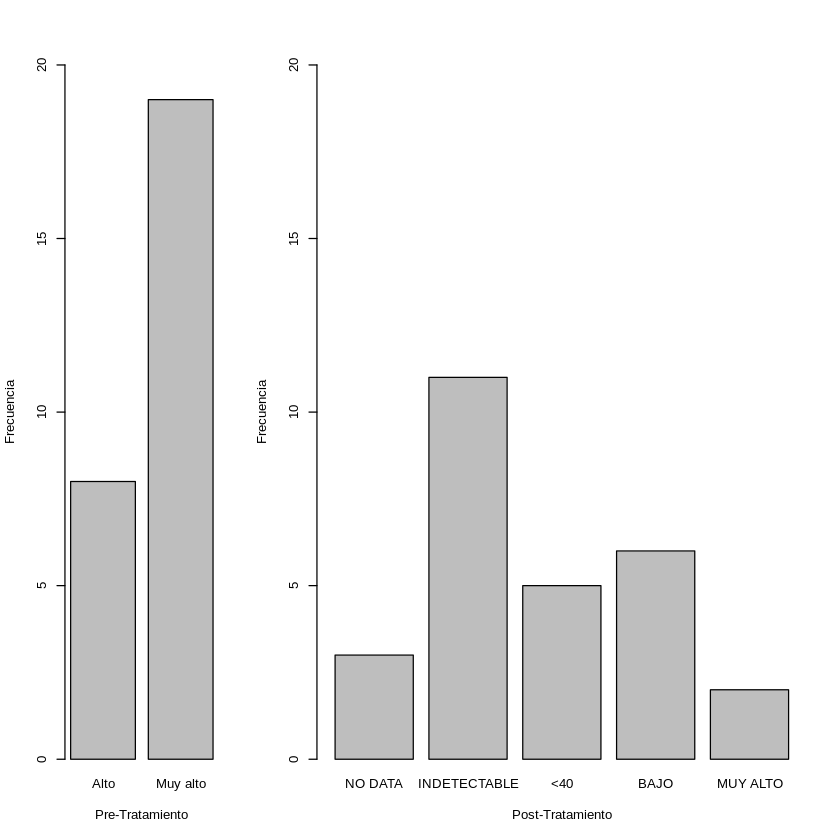

In [115]:
mat_layout<-matrix(c(1,1,1,2,2,2,2,2,2,2),nrow=1,byrow = TRUE)
layout(mat_layout)

data$Nivel1=Nivel1

df1<- data %>% group_by(Nivel1) %>% summarize(n=n())
df2<- data %>% group_by(Nivel) %>% summarize(n=n())

p<-c("NO DATA","INDETECTABLE","<40","BAJO","MUY ALTO")
print(df2)
s=c(3,4,2,5,1)
df2$s=s
#print(df2)
barplot(df1$n~df1$Nivel1,ylim=c(0,20),ylab="Frecuencia",xlab="Pre-Tratamiento")
barplot(df2$n~df2$s,names.arg = p,ylim=c(0,20),ylab="Frecuencia",xlab="Post-Tratamiento")

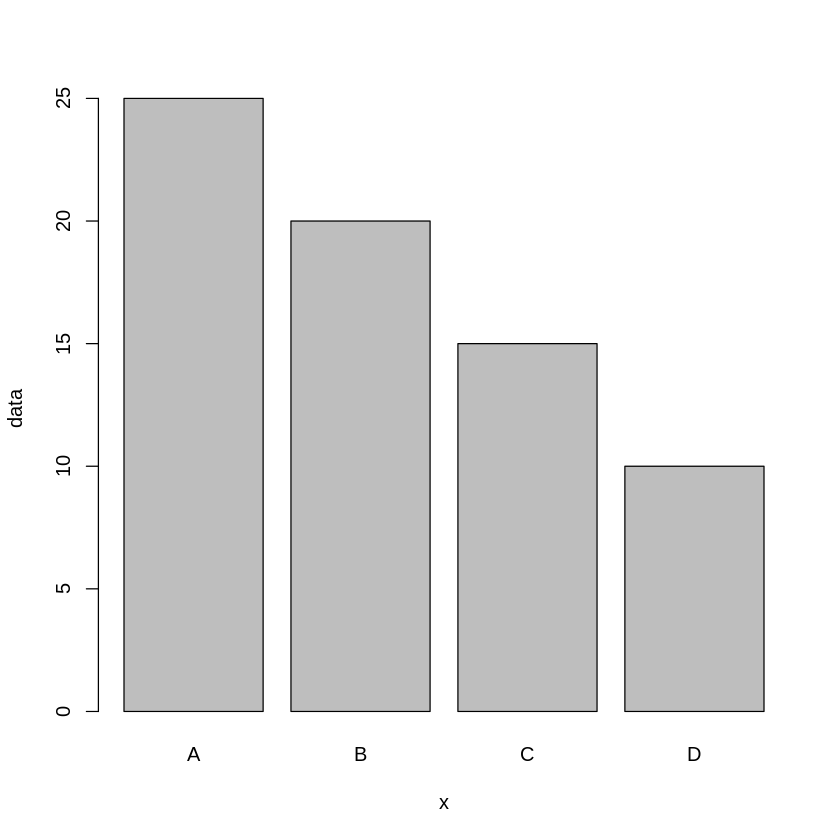

In [95]:
# Create a vector with the data for the bars
data <- c(10, 20, 15, 25)
x<-c("D","B","C","A")

# Define the desired order of the bars
#bar_order <- c(3, 1, 4, 2)

# Rearrange the data vector based on the desired order
#data_reordered <- data[bar_order]

# Create the bar plot with the new bar order
barplot(data~x)